# Linear Regression

In [1]:
from sklearn.linear_model import LinearRegression

## Hypothesis Function

Consider a linear regression model with an input vector $x^i = (X_1 , X_2 , \dots , X_m )$, and a real-valued output $y$. The linear regression model has the form:

$$\large y_p = f_\theta(X) = \theta_0 + \sum_{i=1}^mx^i\theta_i$$

Here:
- $[\theta_1, \theta_2, ... , \theta_n]$ are called **model weights** (generally) OR **coefficients** (in linear regression)
- $\theta_0$ is called **bias** (generally) OR **intercept** (in linear regression)

We consider a set of training data $(x_1 , y_1 ) \dots (x_m , y_m )$ from which to estimate the parameters $\theta$. Here m is the no of training examples we have. 

## Cost/Loss Function 

### Residual sum of squares or Oridnary Least Squares or MSE or L2 loss:

$$\large J_\theta = \frac{1}{2m} \sum_{i=1}^me_i^2 = \sum_{i=1}^m(y_t - \theta_0 - \theta_1X_1 - \theta_2X_2)^2$$

- The coefficient estimates for MSE rely on the independence of the features. 
- When features are correlated and the columns of the design matrix \(X\) have an approximate linear dependence, the design matrix becomes close to singular and as a result, the MSE estimate becomes highly sensitive to random errors in the observed target, producing a large variance. 
- This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

<br>
* Sensitive to outliers, use when outliers are minimum.
* Great to penalize/learn outliers.  Outliers get exponential weightage.

**Advantage:**
- The MSE is great for ensuring that our trained model has no outlier predictions with huge errors, since the MSE puts larger weight on theses errors due to the squaring part of the function.

**Disadvantage:**
- If our model makes a single very bad prediction, the squaring part of the function magnifies the error. Yet in many practical cases we don’t care much about these outliers and are aiming for more of a well-rounded model that performs good enough on the majority.

### Absolute or Laplace or MAE  or L1 loss:
$$\large J_\theta = \frac{1}{m} \sum_{i=1}^m|e_i| = \sum_{i=1}^m|y_t - \theta_0 - \theta_1X_1 - \theta_2X_2|$$

**Advantage:**
- Will ignore outliers in your data. Because it is takign absolute error, and so it will weight all data points on the same linear scale. 
- So, Outliers are handled better than MSE, as it is not penalising the model by squaring the error value. 

**Disadvantage:**
- Computaionally Expensive

**MAE vs MSE:**
In general, MSE loss is preferred in most cases. But when there are outliers in the dataset, MSE loss will not perform well, because the error rate is magnified. One should consider using MAE or simply remove the outliers from the dataset before training.

In [2]:
import numpy as np

y = np.array([1,200,3,4,5], dtype=int)
y_p = np.array([1,25,3,4,5], dtype=int)

def MSE(y,y_p):
    return sum(np.square((y-y_p)))/len(y)

def MAE(y,y_p):
    return sum(np.abs((y-y_p)))/len(y)

In [3]:
print(MSE(y,y_p)) #Allows outlier errors to contribute more to the overall error

6125.0


In [4]:
print(MAE(y,y_p)) #Not sensitive to outliers, Treats all points equally

35.0


### Huber loss:

It is between L1 and L2 loss.

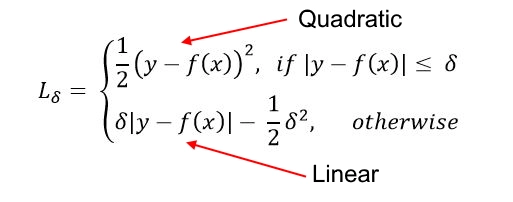

In [5]:
# Huber loss function
def huber_loss(y, y_pred, delta=1.0):
    huber_mse = 0.5*(y-y_pred)**2
    huber_mae = delta * (np.abs(y - y_pred) - 0.5 * delta)
    return sum(np.where(np.abs(y - y_pred) <= delta, huber_mse, huber_mae))/len(y)

In [6]:
print(huber_loss(y, y_p))

34.9


## Assumptions of Linear Regression

The regression model relies on several assumptions:

 - The independent variable is not random.
 - Homoscedasticity: The variance of the error term is constant across observations. This is important for evaluating the goodness of the fit.
 - The errors are not autocorrelated. The Durbin-Watson statistic detects this; if it is close to 2, there is no autocorrelation.
 - The errors are normally distributed. If this does not hold, we cannot use some of the statistics, such as the F-test.

If we confirm that the necessary assumptions of the regression model are satisfied, we can safely use the statistics reported to analyze the fit. 

# Linear Models with Regularisation

- Regularization is the process of introducing additional information to minimize overfitting. 
- Regularization discourages unnecessary complexity.
- In regularisation, we try to shrink the regression coefficients by imposing a penalty on their size. 

#### One Way to Regularize: Add a constraint to the loss function

Regularized Loss = Loss Function + Constraint

Here constraint = $\large \sum_{j=1}^n |\theta_j|^p$ .

- Depending upon the value of the parameter $p$ in the constraint, we can have different types of regularisation like L1 (p=1) and L2 (p2). 

- This is more generally known as Lp regularizer.

- For making visualization easy, let us plot them in 2D space. For that we suppose that we just have two parameters.

<center><img src="images/lp_reg.png" width="80%"/></center>

## Lasso (Least Absolute Shrinkage Selector Operator) Regression

In [ ]:
from sklearn.linear_model import Lasso

#### Linear Regression Loss Function + L1 Regularization

Here we see that the loss function is modified with an extra term called the penalty term. 

$$\large J_\theta = \frac{1}{2m} \sum_{i=1}^me_i^2 = \frac{1}{2m} \sum_{i=1}^m(y_t - \theta_0 - \theta_1X_1 - \theta_2X_2)^2 + \lambda \sum_{j=1}^n|\theta_j|$$

$$ L1 = \large \lambda \sum_{j=1}^n|\theta_j| $$

Considering two independent variables, the penalty can be given as = $|\theta_1| + |\theta_2|$ .

Notice that the intercept $\theta_0$ has been left out of the penalty term. Penalization of the intercept would make the  procedure depend on the origin chosen for y.

- Here $\lambda$ is a **hyperparameter** and should be _set at the time of model training_. Higher the values of lambda, bigger is the penalty.
- L1 shrinks the weights using the absolute values of the weight coefficients (i.e., the weight vector).
- Penalize the model by the absolute weight coefficients.

<center><img src="images/lasso.png" width="50%"/></center>

#### The effect of L1 loss
 - Penalize large coefficients - Large coefficients will increase the size of the total error functions.
 - L1 regularization induces sparsity. Sparsity means as many values will be zero as possible.

#### Why Lasso?
 - lasso selects only some feature while reduces the coefficients of others to zero. This property is known as **feature selection** and which is absent in case of ridge.
 - It is generally used when we have more number of features, because it automatically does feature selection.

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#### Linear Regression Loss Function + L2 Regularization

$$\large J_\theta = \frac{1}{2m} \sum_{i=1}^me_i^2 = \sum_{i=1}^m(y_t - \theta_0 - \theta_1X_1 - \theta_2X_2)^2 + \lambda \sum_{j=1}^n\theta_j^2$$

$$ \large L2 = \lambda \sum_{j=1}^n\theta_j^2$$

The ridge coefficients minimize a penalized residual sum of squares

- Here again $\lambda$ is a hyperparameter
- L2 shrinks the weights by computing the Euclidean norm of the weight coefficients (the weight vector )
- it is mostly used to prevent multicollinearity.

<center><img src="images/ridge.png" width="50%"/></center> 

For both Lasso and Ridge: λ -> Regularization parameter
-----

λ parameter controls the regularization strength, aka the size of the shaded area.

The larger the value of the stronger the regularization of the model. 

## Elastic Net

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters. So it uses both L1 and L2 penality term

<center><img src="images/elastic.png" width="75%"/></center>